# Install dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os

# Add split column to the data

In [ ]:
filename = 'Data_sequences_signal_withClass.txt'

data = pd.read_table(filename)

In [ ]:
chrom_size = {'chr2L': 23513712, 'chr2R': 25286936,
              'chr3L': 28110227,'chr3R': 32079331,
              'chrX': 23542271, 'chr4': 1348131, 'chrY': 3667352}

In [ ]:
# check number of sequences between tissues
data['seqnames'].value_counts()

In [ ]:
data

In [ ]:
split = []

for i in range(len(data)):
    if data['seqnames'][i] == 'chr2L' and data['end'][i] < chrom_size['chr2L'] / 2:
        split.append('fold_chr2L_head')
    elif data['seqnames'][i] == 'chr2L' and data['end'][i] >= chrom_size['chr2L'] / 2:
        split.append('fold_chr2L_tail')
    elif data['seqnames'][i] == 'chr2R' and data['end'][i] < chrom_size['chr2R'] / 2:
        split.append('fold_chr2R_head')
    elif data['seqnames'][i] == 'chr2R' and data['end'][i] >= chrom_size['chr2R'] / 2:
        split.append('fold_test')
    elif data['seqnames'][i] == 'chr3L' and data['end'][i] < chrom_size['chr3L'] / 2:
        split.append('fold_chr3L_head')
    elif data['seqnames'][i] == 'chr3L' and data['end'][i] >= chrom_size['chr3L'] / 2:
        split.append('fold_chr3L_tail')
    elif data['seqnames'][i] == 'chr3R' and data['end'][i] < chrom_size['chr3R'] / 2:
        split.append('fold_chr3R_head')
    elif data['seqnames'][i] == 'chr3R' and data['end'][i] >= chrom_size['chr3R'] / 2:
        split.append('fold_chr3R_tail')
    elif data['seqnames'][i] == 'chrX' and data['end'][i] < chrom_size['chrX'] / 2:
        split.append('fold_chrX_head')
    elif data['seqnames'][i] == 'chrX' and data['end'][i] >= chrom_size['chrX'] / 2:
        split.append('fold_chrX_tail')
    elif data['seqnames'][i] == 'chrY' or data['seqnames'][i] == 'chr4':
        split.append('fold_4Y')
    else:
        split.append('other')
        
data['split'] = split

In [ ]:
data['split'].value_counts()

### Save data with split

In [ ]:
# data.to_csv('data_with_split.txt', sep='\t', index=False)

### Load data with split

In [2]:
data = pd.read_table('data_with_split.txt')

In [3]:
data

,seqnames,start,end,name,strand,S2_cardiac_log2,S2_fat_body_log2,S2_hemocytes_log2,S2_mesoderm_log2,S2_neuro_log2,S2_somatic_log2,S2_visceral_log2,Sequence,Class,split
0,chr2L,5051,6051,chr2L_5051_6051,+,5.721734,5.896059,5.633513,5.954741,5.907287,5.512483,5.943708,ACAGAGGAAGCAGAACAGATATTTAGATTGCCTCTCATTTTCTCTC...,positive,fold_chr2L_head
1,chr2L,5101,6101,chr2L_5101_6101,+,6.221332,6.316148,5.882738,6.278539,6.160721,5.903422,6.287967,ATTATAGGGTGAAATATGATCGCGTATGCGAGAGTAGTGCCAACAT...,positive,fold_chr2L_head
2,chr2L,5151,6151,chr2L_5151_6151,+,6.490758,6.519899,6.051901,6.446976,6.277693,6.116589,6.472559,TGATCTTCGATTTTTTGGCAACCCAAAATGGAGGCGGACGAACGAG...,positive,fold_chr2L_head
3,chr2L,5201,6201,chr2L_5201_6201,+,6.730803,6.700606,6.339631,6.634181,6.503401,6.362970,6.707124,TAATGATAAGATGATTCAAAAAGACAATGCACGACAGAGAGAGCAG...,positive,fold_chr2L_head
4,chr2L,5251,6251,chr2L_5251_6251,+,6.804389,6.778301,6.533721,6.731550,6.633438,6.480213,6.819311,GATAATTAAATTGCCCCTCATTTTCTCTGGCAAATTGTAGGGTGAA...,positive,fold_chr2L_head
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264267,chr2R,14446951,14447951,chr2R_14446951_14447951,-,3.669696,4.093594,3.755785,3.952706,3.941482,3.603252,3.794842,GTTGTGTGAGTTGCACGTGCTGGCTGACTGGCTCCATCTGGCGGAC...,negative,fold_test
1264268,chr2L,9718401,9719401,chr2L_9718401_9719401,-,4.183883,3.875023,3.611597,3.947002,3.666916,4.042023,3.789604,TTTGTGAAAACACACACAAGTACCATATATTTCGAGTAGCATTAGC...,negative,fold_chr2L_head
1264269,chr2R,15902401,15903401,chr2R_15902401_15903401,-,4.664915,4.455853,4.414318,4.558843,4.653977,4.484235,4.453103,AGCCCCGCACATCGGTGCGGTCCACTCCAGGTCCTCCGCTTGCCGC...,negative,fold_test
1264270,chr3R,10425801,10426801,chr3R_10425801_10426801,-,4.218890,4.541725,4.391781,4.216486,4.330164,4.253407,3.958323,AGACTTATACATCCTGACACATTCCATGCCCCGAACTTTAGCTGCA...,negative,fold_chr3R_head


In [4]:
assert len(data[data['split'] == 'fold_chr2L_head']) + len(data[data['split'] == 'fold_chr2L_tail']) == len(data[data['seqnames'] == 'chr2L'])
assert len(data[data['split'] == 'fold_chr2R_head']) + len(data[data['split'] == 'fold_test']) == len(data[data['seqnames'] == 'chr2R'])
assert len(data[data['split'] == 'fold_chr3L_head']) + len(data[data['split'] == 'fold_chr3L_tail']) == len(data[data['seqnames'] == 'chr3L'])
assert len(data[data['split'] == 'fold_chr3R_head']) + len(data[data['split'] == 'fold_chr3R_tail']) == len(data[data['seqnames'] == 'chr3R'])
assert len(data[data['split'] == 'fold_chrX_head']) + len(data[data['split'] == 'fold_chrX_tail']) == len(data[data['seqnames'] == 'chrX'])
assert len(data[data['split'] == 'fold_4Y']) == (len(data[data['seqnames'] == 'chr4']) + len(data[data['seqnames'] == 'chrY']))

In [5]:
data['split'].value_counts()

split
fold_chr3R_tail    151124
fold_chr3R_head    146764
fold_chr3L_head    135574
fold_chr3L_tail    130938
fold_test          122466
fold_chr2R_head    115900
fold_chr2L_head    113046
fold_chrX_head     109946
fold_chr2L_tail    109232
fold_chrX_tail     106262
fold_4Y             23020
Name: count, dtype: int64

In [6]:
data[data['split'] == 'fold_test']['seqnames'].unique()

array(['chr2R'], dtype=object)

### One-hot encode DNA sequence data

In [7]:
# define a dictionary to map nucleotides to their one-hot encoded representation
nucleotide_dict = {'A': [1, 0, 0, 0],
                   'C': [0, 1, 0, 0],
                   'G': [0, 0, 1, 0],
                   'T': [0, 0, 0, 1],
                   'N': [0, 0, 0, 0]} # sometimes there are Ns

# define a function to one-hot encode a single DNA sequence
def one_hot_encode(seq):
    return np.array([nucleotide_dict[nuc] for nuc in seq])

# function to load sequences and enhancer activity
def prepare_input(data_set):

  # one-hot encode DNA sequences, apply function
  seq_matrix = np.array(data_set['Sequence'].apply(one_hot_encode).tolist())

  # Get output array with mesoderm, visceral, cardiac and and somatic activities   
  Y_mesoderm = data_set.S2_mesoderm_log2.values
  Y_visceral = data_set.S2_visceral_log2.values
  Y_cardiac = data_set.S2_cardiac_log2.values
  Y_somatic = data_set.S2_somatic_log2.values

  # dimensions are (number of sequences, length of sequences, nucleotides)
  print(f"X: {seq_matrix.shape}, Y_mesoderm: {Y_mesoderm.shape}, Y_visceral: {Y_visceral.shape}, Y_cardiac: {Y_cardiac.shape}, , Y_somatic: {Y_somatic.shape}")

  Y = [Y_mesoderm, Y_visceral, Y_cardiac, Y_somatic]

  return seq_matrix, Y

# Process data into train, val, test sets

In [8]:
### Validation fold candidates:
# 'fold_chr2R_head': split_1
# 'fold_chr2L_head': split_2
# 'fold_chr2L_tail': split_3
# 'fold_chr3L_head': split_4
# 'fold_chr3L_tail': split_5
# 'fold_chr3R_head': split_6
# 'fold_chr3R_tail': split_7
# 'fold_chrX_head': split_8
# 'fold_chrX_tail': split_9

val_fold = 'fold_chrX_tail' # change this for different splits

X_test, Y_test = prepare_input(data[data['split'] == 'fold_test'])
X_val, Y_val = prepare_input(data[data['split'] == val_fold])
X_train, Y_train = prepare_input(data[(data['split'] != 'fold_test') & (data['split'] != val_fold)])

X: (122466, 1001, 4), Y_mesoderm: (122466,), Y_visceral: (122466,), Y_cardiac: (122466,), , Y_somatic: (122466,)
X: (106262, 1001, 4), Y_mesoderm: (106262,), Y_visceral: (106262,), Y_cardiac: (106262,), , Y_somatic: (106262,)
X: (1035544, 1001, 4), Y_mesoderm: (1035544,), Y_visceral: (1035544,), Y_cardiac: (1035544,), , Y_somatic: (1035544,)


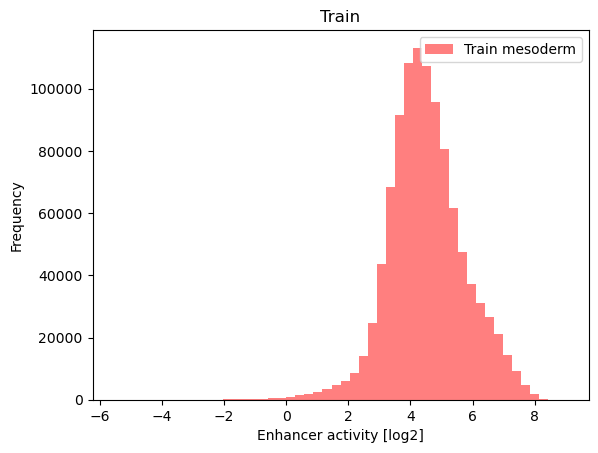

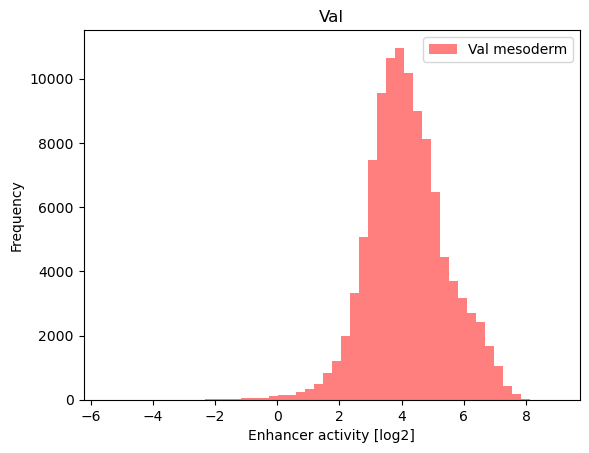

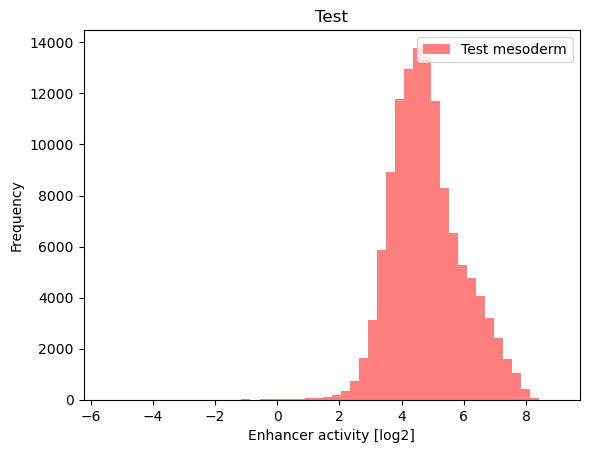

In [9]:
# Look at distribution of activities for each fold
def hist_activities(fold, Y):

  plt.hist(Y[0], alpha=0.5, bins=50, label=fold + ' mesoderm', color='red', range=[-5.5, 9])
#   plt.hist(Y[1], alpha=0.5, bins=50, label=fold +' visceral', color='blue', range=[-5.5, 9])
#   plt.hist(Y[2], alpha=0.5, bins=50, label=fold + ' cardiac', color='orange', range=[-5.5, 9])
#   plt.hist(Y[3], alpha=0.5, bins=50, label=fold +' somatic', color='green', range=[-5.5, 9])

  plt.legend(loc='upper right')
  plt.xlabel('Enhancer activity [log2]')
  plt.ylabel('Frequency')
  plt.title(fold)

  plt.show()

hist_activities("Train", Y_train)
hist_activities("Val", Y_val)
hist_activities("Test", Y_test)

## Save data
Let's save intermediate files in case you want to access it later without running the cells above.

In [ ]:
### Save test set, you need to save test set ONLY ONCE!
# save_dir = './data/test' 
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
    
# joblib.dump(X_test, save_dir + '/X_test')
# joblib.dump(Y_test, save_dir + '/Y_test')

In [10]:
# save train, val sets
save_dir = './data/split_9' # change folder name for different splits
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

joblib.dump(X_train, save_dir + '/X_train')
joblib.dump(Y_train, save_dir + '/Y_train')
joblib.dump(X_val, save_dir + '/X_val')
joblib.dump(Y_val, save_dir + '/Y_val')

['./data/split_9/Y_val']

## Load data

In [2]:
# data can be loaded like this
import joblib

load_dir = './data/split_1' # change folder name for different splits

X_train = joblib.load(load_dir + '/X_train')
Y_train = joblib.load(load_dir + '/Y_train')

X_val = joblib.load(load_dir + '/X_val')
Y_val = joblib.load(load_dir + '/Y_val')

X_test = joblib.load('./data/test/X_test')
Y_test = joblib.load('./data/test/Y_test')

In [3]:
print(f"X_train: {X_train.shape}")
print(f"Y_train: {Y_train[0].shape}")

print(f"X_val: {X_val.shape}")
print(f"Y_val: {Y_val[0].shape}")

print(f"X_test: {X_test.shape}")
print(f"Y_test: {Y_test[0].shape}")

X_test: (122466, 1001, 4)
Y_test: (122466,)
